# 3. Notebook: Multivarite Analysis

## 0. import the packages and the dataset 

In [1]:
#import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
import cars_functions
##libraries for the multivariate analysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
#import the dataset
df_cars_final=pd.read_csv('data/df_cars_final.csv', index_col=0)
df_cars_final.head()

,Nr_Doors,Luggagerack_final,Capacity_final,Speedometer_final,WeightOwn_final,Nr_Person_gr,Rating_gr,WeightTotal_final,Flag_Guarantee,Performance_kW_final,...,LEXUS,SUBARU,LANCIA,JAGUAR,SAAB,JEEP,PORSCHE,ROVER,DAIHATSU,SSANGYONG
0,5.0,450.0,1995.0,196624.0,1696.0,3.0,3.0,2320.0,0.0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,280.0,1197.0,38000.0,1032.0,2.0,3.0,1620.0,0.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,500.0,1998.0,250000.0,1505.0,2.0,2.0,2005.0,0.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,560.0,1995.0,249000.0,1715.0,2.0,2.0,2365.0,0.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,295.0,1388.0,71000.0,1054.0,2.0,2.0,1495.0,0.0,71.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#check the dataset
df_cars_final.describe()

,Nr_Doors,Luggagerack_final,Capacity_final,Speedometer_final,WeightOwn_final,Nr_Person_gr,Rating_gr,WeightTotal_final,Flag_Guarantee,Performance_kW_final,...,LEXUS,SUBARU,LANCIA,JAGUAR,SAAB,JEEP,PORSCHE,ROVER,DAIHATSU,SSANGYONG
count,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000,...,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000,84453.000000
mean,4.512924,491.304074,1829.889809,166804.909038,1370.665708,1.990444,2.308929,1910.575646,0.023066,93.329142,...,0.003386,0.003197,0.003126,0.002842,0.002771,0.002273,0.001516,0.001492,0.001409,0.001255
std,0.825280,673.930694,572.417974,93560.776816,307.451863,0.395459,0.482194,371.721586,0.150114,40.351725,...,0.058095,0.056452,0.055824,0.053233,0.052565,0.047627,0.038902,0.038597,0.037511,0.035406
min,2.000000,2.000000,1.000000,1.000000,80.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,320.000000,1399.000000,107668.000000,1155.000000,2.000000,2.000000,1650.000000,0.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,435.000000,1781.000000,169000.000000,1350.000000,2.000000,2.000000,1883.000000,0.000000,85.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,505.000000,1997.000000,224000.000000,1550.000000,2.000000,3.000000,2120.000000,0.000000,110.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,11500.000000,5000.000000,700000.000000,2800.000000,3.000000,3.000000,3500.000000,1.000000,400.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1. Check the correlation

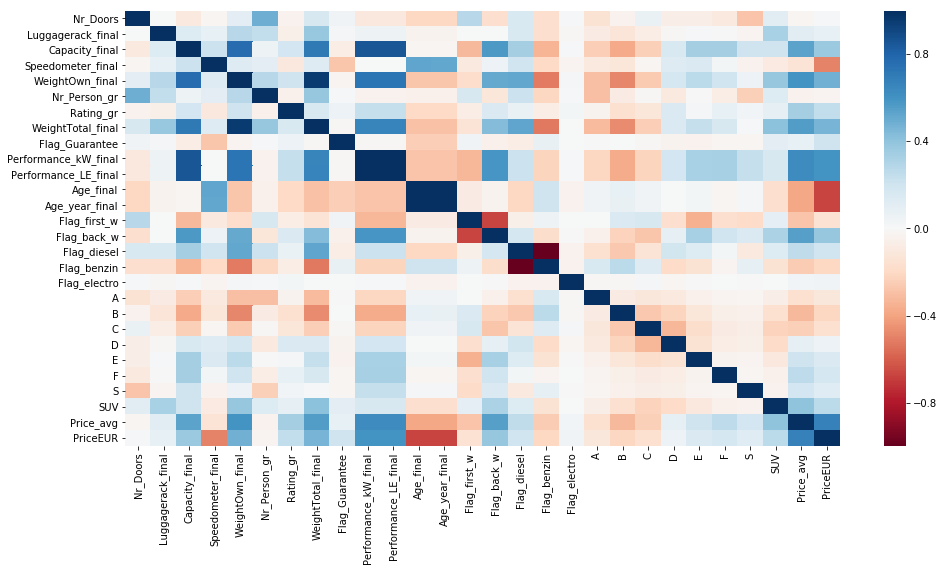

In [4]:
#heatmap for the correlation
#without the producers

df_cars_final_temp=df_cars_final.iloc[:,:28]
df_cars_final_temp.head()
df_corr=df_cars_final_temp.corr()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, cmap='RdBu')
#plt.savefig('pictures/correlation_heatmap')


In [5]:
#there is large correlation between the Performance features - we need to drop one - drop Performance_LE_final
#there is large correlation between the Pweight variables - we need to drop one - drop WeightOwn
#large negativ correlation between flag_diesel and flag_benzin - drop flag_benzin
#large negativ correlation between flag_first_w and flag_back_w - drop flag_first_w
#drop the Age and keep the Age in years variable

df_cars_final=df_cars_final.drop(['Performance_LE_final', 'WeightOwn_final', 'Flag_benzin', 'Age_final', 'Flag_first_w'], axis=1)

df_cars_final.columns


Index(['Nr_Doors', 'Luggagerack_final', 'Capacity_final', 'Speedometer_final',
       'Nr_Person_gr', 'Rating_gr', 'WeightTotal_final', 'Flag_Guarantee',
       'Performance_kW_final', 'Age_year_final', 'Flag_back_w', 'Flag_diesel',
       'Flag_electro', 'A', 'B', 'C', 'D', 'E', 'F', 'S', 'SUV', 'Price_avg',
       'PriceEUR', 'OPEL', 'VOLKSWAGEN', 'BMW', 'FORD', 'MERCEDES-BENZ',
       'AUDI', 'RENAULT', 'TOYOTA', 'SKODA', 'PEUGEOT', 'MAZDA', 'SUZUKI',
       'FIAT', 'CITROEN', 'NISSAN', 'HONDA', 'VOLVO', 'SEAT', 'HYUNDAI', 'KIA',
       'MITSUBISHI', 'ALFA ROMEO', 'CHEVROLET', 'DAEWOO', 'DACIA', 'CHRYSLER',
       'SMART', 'LADA', 'LAND ROVER', 'MINI', 'LEXUS', 'SUBARU', 'LANCIA',
       'JAGUAR', 'SAAB', 'JEEP', 'PORSCHE', 'ROVER', 'DAIHATSU', 'SSANGYONG'],
      dtype='object')

## 2. Scale and split the dataset

### 2.1 Create the feature matrix and the target variable

In [6]:
y=df_cars_final['PriceEUR']
X=df_cars_final.drop(['PriceEUR'], axis=1)

X.head()

,Nr_Doors,Luggagerack_final,Capacity_final,Speedometer_final,Nr_Person_gr,Rating_gr,WeightTotal_final,Flag_Guarantee,Performance_kW_final,Age_year_final,...,LEXUS,SUBARU,LANCIA,JAGUAR,SAAB,JEEP,PORSCHE,ROVER,DAIHATSU,SSANGYONG
0,5.0,450.0,1995.0,196624.0,3.0,3.0,2320.0,0.0,110.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,280.0,1197.0,38000.0,2.0,3.0,1620.0,0.0,66.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,500.0,1998.0,250000.0,2.0,2.0,2005.0,0.0,96.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,560.0,1995.0,249000.0,2.0,2.0,2365.0,0.0,135.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,295.0,1388.0,71000.0,2.0,2.0,1495.0,0.0,71.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.2 Scale the feature matrix

In [7]:
#scale the dataset: the variables have different scales 

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

### 2.3 Split the data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3,random_state=0)

In [9]:
#check the distribution of the training and test target variable
y_train.describe()

count    59117.000000
mean      7976.199131
std       8269.663039
min        153.000000
25%       2517.000000
50%       4875.000000
75%      10356.000000
max      63805.000000
Name: PriceEUR, dtype: float64

In [10]:
y_test.describe()

count    25336.000000
mean      8085.608699
std       8392.190535
min        156.000000
25%       2546.000000
50%       5034.000000
75%      10298.250000
max      63727.000000
Name: PriceEUR, dtype: float64

## 3. Multivariate analysis

### 3.1 Linear Regression

In [11]:
lr=LinearRegression()
cars_functions.test_classifier(X_train, y_train, X_test, y_test, lr)


Testing LinearRegression
Learing time 0.27608704566955566s
Predicting time 0.00853109359741211s
=================================== Results Training set======================================
         bias
MSE       15273207.890422035
R2        0.7766623295507098
=================================== Results Testing set======================================
         bias
MSE       15755171.007584488
R2        0.7762878393933721


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 3.2 Linear regression  with SelectKBest

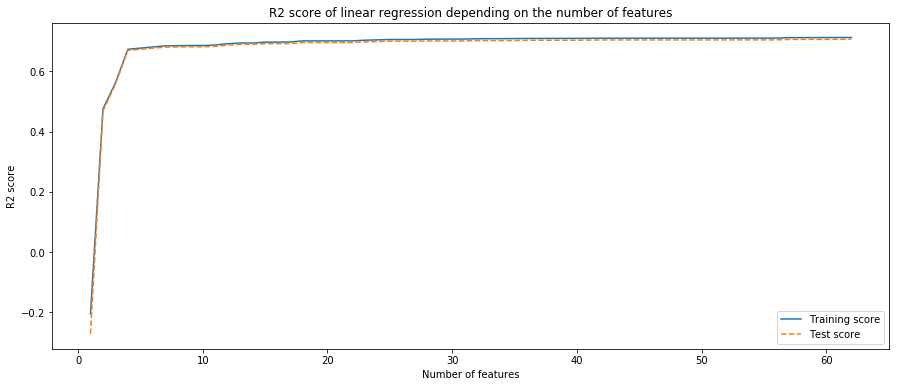

In [12]:
#check the number of features - if I don't include all the feature, how does the model perform?
#after 15 features it makes not so much difference, if I involve more
training_error=[]
test_error=[]
training_score=[]
test_score=[]
n_col=len(X.columns)

vals=np.arange(1,n_col+1)
for k in vals:
    pip=Pipeline([('sel', SelectKBest(f_regression, k)), ('lr', LinearRegression())])
    pip.fit(X_train, y_train)
    test_error.append(mean_squared_error(pip.predict(X_test), y_test))
    training_error.append(mean_squared_error(pip.predict(X_train), y_train))
    test_score.append(r2_score(pip.predict(X_test), y_test))
    training_score.append(r2_score(pip.predict(X_train), y_train))
    
fig, ax=plt.subplots(figsize=(15,6))
ax.plot(vals, training_score, label='Training score')
ax.plot(vals, test_score,'--', label='Test score')

plt.ylabel('R2 score')
plt.xlabel('Number of features')
plt.legend(loc='best')
plt.title('R2 score of linear regression depending on the number of features')
plt.savefig('pictures/select_k_linreg')

### 3.3 Linear Regression with polinomial features

In [13]:
#Build a pipeline for polynomial fitting, fit polynomials of degree 1 to the number of features, 
#and plot your training and testing errors for each
degrees=4

poly_training_error=[]
poly_test_error=[]
poly_training_r2=[]
poly_test_r2=[]
for d in np.arange(1,degrees):
    pip=Pipeline([('sel', SelectKBest(f_regression, 20)), ('poly', PolynomialFeatures(degree=d)), ('lr', LinearRegression())])
    pip.fit(X_train, y_train)
    poly_test_error.append(mean_squared_error(pip.predict(X_test), y_test))
    poly_training_error.append(mean_squared_error(pip.predict(X_train), y_train))
    poly_test_r2.append(r2_score(pip.predict(X_test), y_test))
    poly_training_r2.append(r2_score(pip.predict(X_train), y_train))

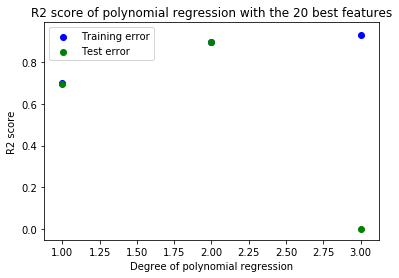

In [14]:
fig, ax=plt.subplots()

plt.scatter(np.arange(1,degrees), poly_training_r2,c='b', label='Training error')
plt.scatter(np.arange(1,degrees), poly_test_r2,c='g', label='Test error')
plt.legend(loc='upper left')
plt.ylabel('R2 score')
plt.xlabel('Degree of polynomial regression')
plt.title('R2 score of polynomial regression with the 20 best features')
plt.savefig('pictures/select_k_linreg_poli20')

The plot show, the with 2 degree we could improve our model, but with 3-degree polynomials there is a significant overfitting in the model. The R2 of the test set is very low compared to the training set - the model can't generalize well. 

### 3.4 Ridge regression with parameter tuning

In [15]:
#I tried different alphas by the Ridge regression

ridge = Ridge(random_state=0)
alphas=[10**i for i in range(-7,6)]

parameters = [{'alpha': alphas}]

clf = GridSearchCV(ridge, parameters, cv=3)
clf.fit(X_train, y_train)

scores_ridge = clf.cv_results_['mean_test_score']
std_error_ridge = clf.cv_results_['std_test_score']

In [16]:
clf.cv_results_['mean_test_score']

array([0.77584586, 0.77584586, 0.77584586, 0.77584586, 0.77584586,
       0.77584586, 0.77584588, 0.77584599, 0.77584667, 0.77583242,
       0.77528563, 0.76206405, 0.58797823])

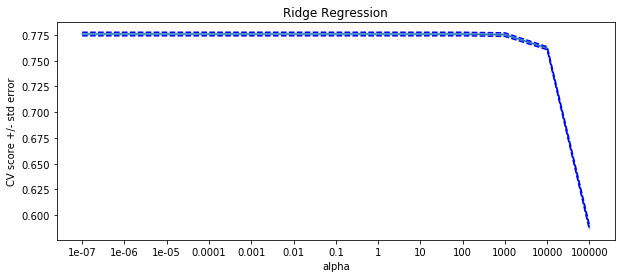

In [17]:
#The performance of the model is very similar for each alpha between 10**-7 and 10**3, afterwards it starts to decrease
fig, ax= plt.subplots(figsize=(10,4))
ind=range(len(alphas))
plt.plot(ind, scores_ridge)

# plot error lines showing +/- std. errors of the scores

plt.plot(ind, scores_ridge + std_error_ridge, 'b--')
plt.plot(ind, scores_ridge - std_error_ridge, 'b--')

plt.fill_between(ind, scores_ridge + std_error_ridge, scores_ridge - std_error_ridge, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.title('Ridge Regression')
plt.xticks(ind, alphas)
plt.show()

### 3.5 Lasso regression with parameter tuning

In [18]:
lasso = Lasso(random_state=0)
alphas=[10**i for i in range(-7,6)]

parameters = [{'alpha': alphas}]

clf = GridSearchCV(lasso, parameters, cv=3)
clf.fit(X_train, y_train)

scores_lasso = clf.cv_results_['mean_test_score']
std_error_lasso = clf.cv_results_['std_test_score']

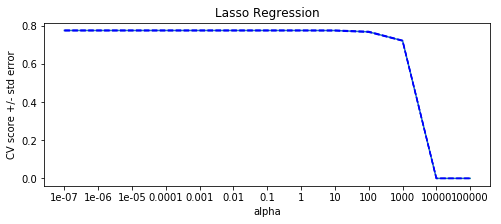

In [19]:
fig, ax= plt.subplots(figsize=(8,3))
ind=range(len(alphas))
plt.plot(ind, scores_lasso)

# plot error lines showing +/- std. errors of the scores

plt.plot(ind, scores_lasso + std_error_lasso, 'b--')
plt.plot(ind, scores_lasso - std_error_lasso, 'b--')

plt.fill_between(ind, scores_lasso + std_error_lasso, scores_lasso - std_error_lasso, alpha=0.2)
plt.xticks(ind, alphas)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.title('Lasso Regression')
ax.set_xticklabels(alphas)
plt.show()

The lasso and ridge regressions have very similar performance.
The performance of the model is doesn't change significantly for alphas between 10**-7 and 10**3, afterwards it starts to decrease.


### 3.6 Decision Tree Regressor with parameter tuning

In [20]:
#all together there are 65 features. 
params={"max_features":["auto","sqrt","log2"], "min_samples_split":[50, 80,100], "max_depth":[5,8, 10],"min_samples_leaf":[30, 50,80]}

dtree=DecisionTreeRegressor(random_state=0)

clf = GridSearchCV(dtree, params, cv=3)
clf.fit(X_train, y_train)

scores_tree = clf.cv_results_['mean_test_score']
scores_tree_std = clf.cv_results_['std_test_score']

In [21]:
print('Best parameter: ', clf.best_params_ )
print('Best score: ',clf.best_score_)

Best parameter:  {'min_samples_leaf': 30, 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 50}
Best score:  0.9109349089955061


In [22]:
best_clf=clf.best_estimator_

cars_functions.test_classifier(X_train, y_train, X_test, y_test, best_clf)


Testing DecisionTreeRegressor
Learing time 0.6142139434814453s
Predicting time 0.021390914916992188s
=================================== Results Training set======================================
         bias
MSE       5016766.662212044
R2        0.9266406253640578
=================================== Results Testing set======================================
         bias
MSE       5938008.969225966
R2        0.9156845193512919


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=30,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [23]:
from io import StringIO
#import StringIO.StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(best_clf, out_file=dot_data, max_depth=3, feature_names=X.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
plt.savefig('pictures/Decision_tree_depth_3')

<Figure size 432x288 with 0 Axes>

Feature ranking:
1. feature: Age_year_final (0.609401)
2. feature: Performance_kW_final (0.251807)
3. feature: Speedometer_final (0.047891)
4. feature: Price_avg (0.043996)
5. feature: WeightTotal_final (0.021311)
6. feature: Capacity_final (0.010112)
7. feature: Flag_back_w (0.008627)
8. feature: E (0.001623)
9. feature: Luggagerack_final (0.001413)
10. feature: Flag_diesel (0.001393)
11. feature: SUV (0.001055)
12. feature: Nr_Doors (0.000832)
13. feature: Rating_gr (0.000180)
14. feature: C (0.000135)
15. feature: D (0.000132)


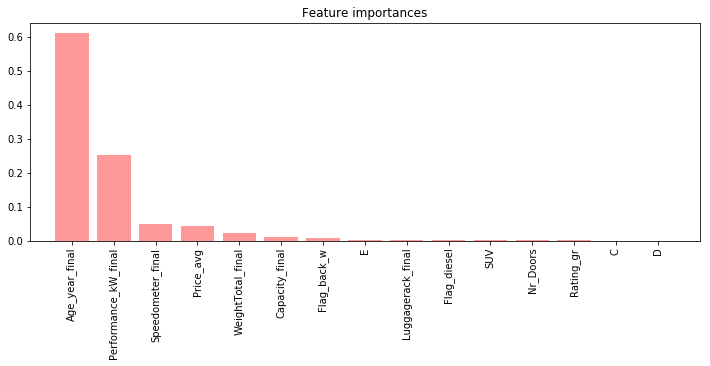

In [25]:
#plot the best 15 features 
cars_functions.plot_feature_importance(best_clf, 15, X)

### 3.7 Random Forest Regression 

In [26]:
#parameters tuning is based on the decesion tree regressor, number of estimators=100
rf=RandomForestRegressor(**clf.best_params_, random_state=0, n_estimators=100, oob_score=True)
cars_functions.test_classifier(X_train, y_train, X_test, y_test, rf)


Testing RandomForestRegressor
Learing time 32.17579412460327s
Predicting time 0.7882561683654785s
=================================== Results Training set======================================
         bias
MSE       4352801.140433418
R2        0.936349686745045
=================================== Results Testing set======================================
         bias
MSE       5042070.780716794
R2        0.9284062008757189


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=30, min_samples_split=50,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [27]:
print(rf.oob_score_)

0.927850298994486


The performance improved further if I used 100 decision trees instead of 1 decision tree

Feature ranking:
1. feature: Age_year_final (0.609975)
2. feature: Performance_kW_final (0.244603)
3. feature: Speedometer_final (0.050919)
4. feature: Price_avg (0.042568)
5. feature: WeightTotal_final (0.019633)
6. feature: Capacity_final (0.017437)
7. feature: Flag_back_w (0.009700)
8. feature: Luggagerack_final (0.001597)
9. feature: Nr_Doors (0.000875)
10. feature: E (0.000703)
11. feature: Flag_diesel (0.000451)
12. feature: SUV (0.000379)
13. feature: Rating_gr (0.000287)
14. feature: C (0.000282)
15. feature: D (0.000175)


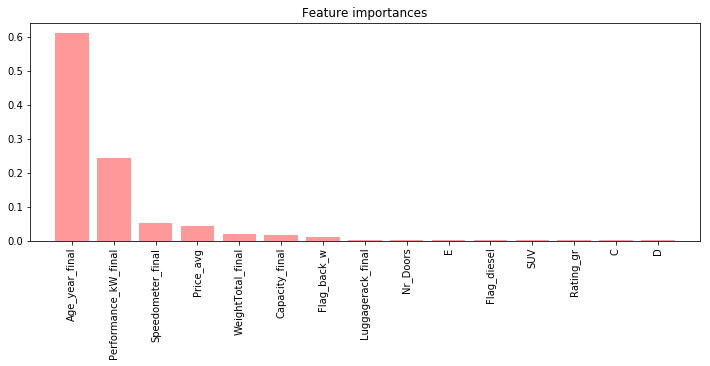

In [28]:
#Feature importance by random forest:

cars_functions.plot_feature_importance(rf, 15, X)

### 3.8 Support verctor machine

In [29]:
from sklearn.svm import SVR
params_svr=[{"kernel": ["rbf"], "C": [1e1,  1e3]},
            {"kernel": ["linear"], "C": [1e1,  1e3]} ,
            {"kernel": ["poly"], "C": [1e1,  1e3] }]


svr =SVR()
clf_svr=GridSearchCV(svr, params_svr, cv=3)
                   
clf_svr.fit(X_train, y_train)

scores_svr = clf_svr.cv_results_['mean_test_score']
scores_svr_std = clf_svr.cv_results_['std_test_score']

In [30]:
best_clf_svr=clf_svr.best_estimator_

cars_functions.test_classifier(X_train, y_train, X_test, y_test, best_clf_svr)


Testing SVR
Learing time 482.8673560619354s
Predicting time 394.0100529193878s
=================================== Results Training set======================================
         bias
MSE       7859867.835984328
R2        0.8850664126932448
=================================== Results Testing set======================================
         bias
MSE       8568799.624018768
R2        0.8783291735283807


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### 3.8. Boosting - AdaBoostRegressor

In [31]:
# Try out different number of estimators for AdaBoost Regression
r2_test = []
mse_test = []
r2_train = []
mse_train= []
    
dtree=DecisionTreeRegressor(**clf.best_params_)
for i in np.arange(1,30):
    boost = AdaBoostRegressor(dtree, n_estimators=i)
    model = boost.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predictions_train = model.predict(X_train)
    r2_test.append(r2_score(y_test, predictions))
    mse_test.append(mean_squared_error(y_test, predictions))
    r2_train.append(r2_score(y_train, predictions_train))
    mse_train.append(mean_squared_error(y_train, predictions_train))
    

Text(0.5, 1.0, 'R2 based on the number of estimators')

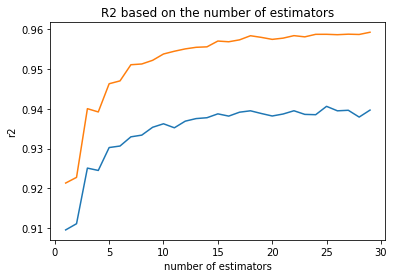

In [32]:
#Plot the R2 for the test and training set
plt.plot(np.arange(1,30), r2_test)
plt.plot(np.arange(1,30), r2_train)

plt.ylabel('r2')
plt.xlabel('number of estimators')
plt.title('R2 based on the number of estimators')


Text(0.5, 1.0, 'MSE based on the number of estimators')

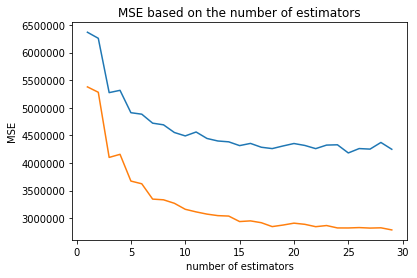

In [33]:
#Plot the MSE for the test and training set

plt.plot(np.arange(1,30), mse_test)
plt.plot(np.arange(1,30), mse_train)

plt.ylabel('MSE')
plt.xlabel('number of estimators')
plt.title('MSE based on the number of estimators')

In [34]:
#n_estimators=18 -> best r2 and MSE

boost = AdaBoostRegressor(dtree, n_estimators=18)
cars_functions.test_classifier(X_train, y_train, X_test, y_test, boost)


Testing AdaBoostRegressor
Learing time 8.811702966690063s
Predicting time 0.2951819896697998s
=================================== Results Training set======================================
         bias
MSE       2894761.6567922244
R2        0.9576703643679639
=================================== Results Testing set======================================
         bias
MSE       4362712.640822061
R2        0.938052600602411


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=30,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=18,
         random_state=None)

Feature ranking:
1. feature: Age_year_final (0.609975)
2. feature: Performance_kW_final (0.244603)
3. feature: Speedometer_final (0.050919)
4. feature: Price_avg (0.042568)
5. feature: WeightTotal_final (0.019633)
6. feature: Capacity_final (0.017437)
7. feature: Flag_back_w (0.009700)
8. feature: Luggagerack_final (0.001597)
9. feature: Nr_Doors (0.000875)
10. feature: E (0.000703)
11. feature: Flag_diesel (0.000451)
12. feature: SUV (0.000379)
13. feature: Rating_gr (0.000287)
14. feature: C (0.000282)
15. feature: D (0.000175)
16. feature: S (0.000170)
17. feature: Nr_Person_gr (0.000166)
18. feature: F (0.000046)


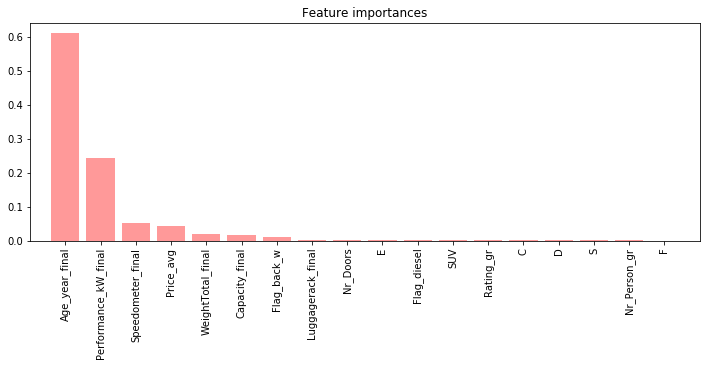

In [35]:
#Feature importance by AdaBoost Regression

cars_functions.plot_feature_importance(rf, 18, X)

### 3.9. Random forest with less variables

In [36]:
##delete
def get_top_vars(clf, n, X):
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1][:n]
    return indices

def build_classifier(clf, X_train, y_train, X_test, y_test):
    model = clf.fit(X_train, y_train)
    predictions = model.predict(X_test)
    predictions_train = model.predict(X_train)
    r2_test = r2_score(y_test, predictions)
    mse_test = mean_squared_error(y_test, predictions)
    r2_train = r2_score(y_train, predictions_train)
    mse_train = mean_squared_error(y_train, predictions_train)
    return r2_test, mse_test, r2_train, mse_train

In [37]:
##2* cars_functions.
r2_test_rf =[]
mse_test_rf =[]
r2_train_rf =[]
mse_train_rf =[]
ind=np.arange(7,30) 

for i in ind:
    cols=get_top_vars(rf, i, X)
    rf_i=RandomForestRegressor(**rf.get_params())
    performance=build_classifier(rf_i, X_train[:,cols], y_train, X_test[:,cols], y_test)
    r2_test_rf.append(performance[0])
    mse_test_rf.append(performance[1])
    r2_train_rf.append(performance[2])
    mse_train_rf.append(performance[3])

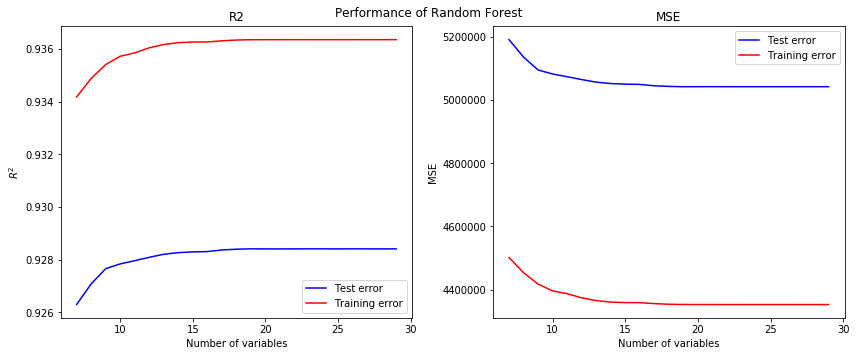

In [38]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(ind, r2_test_rf, 'b', label='Test error')
ax[0].plot(ind, r2_train_rf, 'r', label='Training error')
ax[0].legend()
ax[1].plot(ind, mse_test_rf, 'b', label='Test error')
ax[1].plot(ind, mse_train_rf, 'r', label='Training error')
ax[1].legend()
ax[0].set_xlabel('Number of variables')
ax[1].set_xlabel('Number of variables')
ax[0].set_ylabel('$R^2$') 
ax[1].set_ylabel('MSE')
ax[0].set_title('R2')
ax[1].set_title('MSE')
fig.suptitle('Performance of Random Forest')
plt.tight_layout()
plt.show()

Choosing the best 14 variables would be enough

### 3.9. AdaBoost with less variables

In [39]:
##2* cars_functions.
r2_test_boost =[]
mse_test_boost =[]
r2_train_boost =[]
mse_train_boost =[]
ind=np.arange(7,30) 

for i in ind:
    cols=get_top_vars(boost, i, X)
    
    boost_i=AdaBoostRegressor(dtree, n_estimators=18)
    performance=build_classifier(boost_i, X_train[:,cols], y_train, X_test[:,cols], y_test)
    r2_test_boost.append(performance[0])
    mse_test_boost.append(performance[1])
    r2_train_boost.append(performance[2])
    mse_train_boost.append(performance[3])


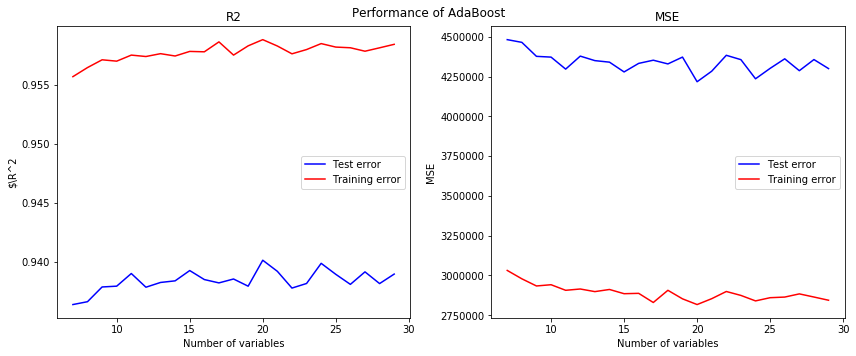

In [40]:
##2* cars_functions.
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(ind, r2_test_boost, 'b', label='Test error')
ax[0].plot(ind, r2_train_boost, 'r', label='Training error')
ax[0].legend()
ax[1].plot(ind, mse_test_boost, 'b', label='Test error')
ax[1].plot(ind, mse_train_boost, 'r', label='Training error')
ax[1].legend()
ax[0].set_xlabel('Number of variables')
ax[1].set_xlabel('Number of variables')
ax[0].set_ylabel(r'$\R^2')
ax[1].set_ylabel('MSE')
ax[0].set_title('R2')
ax[1].set_title('MSE')
fig.suptitle('Performance of AdaBoost')
plt.tight_layout()
plt.show()

It is enough to choose the best 9 variables  -> model's performance won't improve more, if we add more variables.

### 4. Fitting the final model

In [41]:
cols=get_top_vars(boost, 9, X)
boost = AdaBoostRegressor(dtree, n_estimators=18)
cars_functions.test_classifier(X_train[:,cols], y_train, X_test[:,cols], y_test, boost)


Testing AdaBoostRegressor
Learing time 3.08907413482666s
Predicting time 0.20723581314086914s
=================================== Results Training set======================================
         bias
MSE       2919845.033730363
R2        0.9573035741682523
=================================== Results Testing set======================================
         bias
MSE       4417854.143086538
R2        0.9372696307060676


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=30,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=18,
         random_state=None)

In [42]:
#the features
X.iloc[:,cols].columns

Index(['Age_year_final', 'Performance_kW_final', 'Speedometer_final',
       'Price_avg', 'WeightTotal_final', 'Capacity_final', 'Flag_back_w',
       'Luggagerack_final', 'Nr_Doors'],
      dtype='object')

Feature ranking:
1. feature: Age_year_final (0.499360)
2. feature: Performance_kW_final (0.203315)
3. feature: Price_avg (0.067839)
4. feature: Speedometer_final (0.067752)
5. feature: WeightTotal_final (0.062141)
6. feature: Capacity_final (0.059772)
7. feature: Luggagerack_final (0.019234)
8. feature: Flag_back_w (0.014291)
9. feature: Nr_Doors (0.006296)


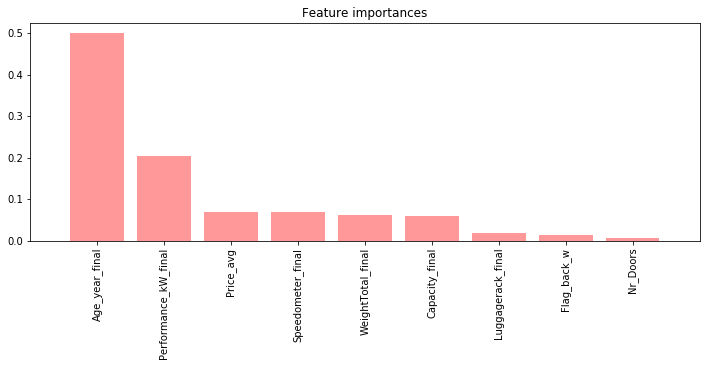

In [76]:
cars_functions.plot_feature_importance(boost, 9, X.iloc[:,cols])
#cc=get_top_vars(boost, 9, X)
#X.iloc[:,cc].columns

#imp = boost.feature_importances_
#imp
#indices = np.argsort(imp)[::-1]

### 4.1 Exporting the model

In [43]:
# save the model to disk
filename ='adaboost.sav'
pickle.dump(boost, open(filename, 'wb'))

#### 4.2. Exporting the StandardScaler for the final variables

In [44]:
X_top_final= X.iloc[:,cols]
scaler_final=StandardScaler()
scaler_final.fit(X_top_final)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
scaler_filename = "scaler.sav"
pickle.dump(scaler_final, open(scaler_filename, 'wb')) 

### 5. Use the model

In [46]:
#import the model an duse the function calc_price to calculate the price
model=pickle.load(open('adaboost.sav', 'rb')) 
scaler_model=pickle.load(open('scaler.sav', 'rb')) 
cars_functions.calc_price(scaler_model, model, 'OPEL CORSA', 11, 55, 190000, 1545,1248, 0, 285)

array([3342.75432811])